In [20]:
import pandas as pd 
import seaborn as sns 
import numpy as np 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [21]:
file_Path = 'drugLibTrain_raw.tsv'
drug_Pd = pd.read_csv(file_Path, sep = '\t')

In [22]:
drug_Pd.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [23]:
drug_Pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


There are some null values in benefits, side effects, and comments

In [24]:
drug_Pd.isnull().sum()

Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       18
sideEffectsReview    75
commentsReview       12
dtype: int64

18 in benefits, 75 in side effects, 12 in comments
There's also 1 in condition, but I don't think it applies to my project

Rating, effectiveness, side effects are good metrics

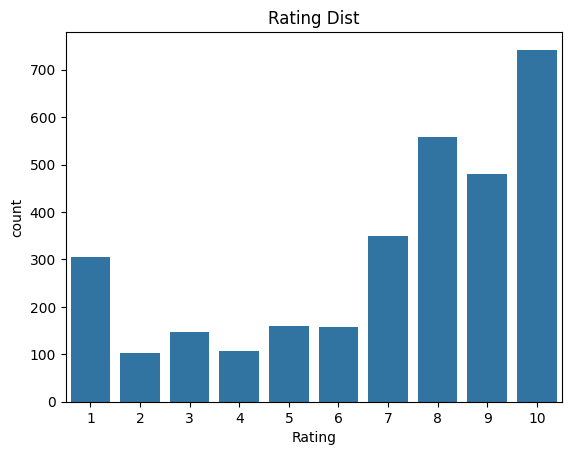

In [25]:
sns.countplot(x='rating', data = drug_Pd)
plt.title('Rating Dist')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

Effectiveness

In [15]:
drug_Pd['effectiveness'].unique()


array(['Highly Effective', 'Marginally Effective', 'Ineffective',
       'Considerably Effective', 'Moderately Effective'], dtype=object)

In [16]:
effect_levels = ['Ineffective', 'Marginally Effective', 'Moderately Effective', 'Considerably Effective', 'Highly Effective']

Dist Graph for Effectiveness

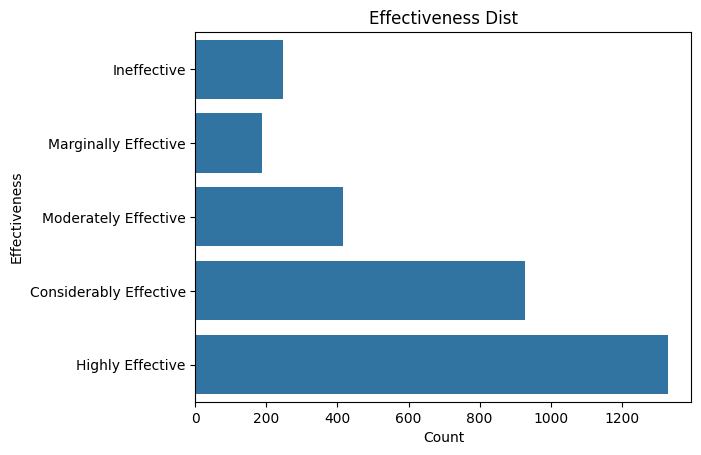

In [18]:
sns.countplot(y='effectiveness', data = drug_Pd, order = effect_levels)
plt.title('Effectiveness Dist')
plt.xlabel('Count')
plt.ylabel('Effectiveness')
plt.show()

Side Effects

In [26]:
drug_Pd['sideEffects'].unique()

array(['Mild Side Effects', 'Severe Side Effects', 'No Side Effects',
       'Extremely Severe Side Effects', 'Moderate Side Effects'],
      dtype=object)

In [27]:
side_effect_levels = ['No Side Effects', 'Mild Side Effects', 'Moderate Side Effects', 'Severe Side Effects', 'Extremely Severe Side Effects']

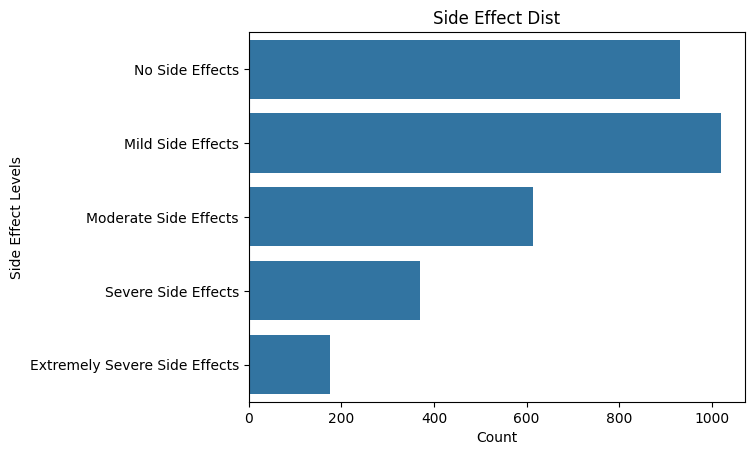

In [28]:
sns.countplot(y='sideEffects', data = drug_Pd, order = side_effect_levels)
plt.title('Side Effect Dist')
plt.xlabel('Count')
plt.ylabel('Side Effect Levels')
plt.show()